<a href="https://colab.research.google.com/github/NickLarsonUVA/DS1002/blob/main/Assignments/06_Pandas_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pandas exercises 1

1. Import dependencies

In [1]:
import pandas as pd

---

In [15]:
list = [98, 24, 46, 87, 33]

2. Convert `list` to a pandas series using `pd.Series`

In [16]:
new_list = pd.Series(list)
print(new_list)

0    98
1    24
2    46
3    87
4    33
dtype: int64


3. Take the above series and add an index that starts at 2 and steps by 3

In [18]:
newindex = range(2, 2 + len(list) * 3, 3)
new_series = pd.Series(list, index=newindex)
print(new_series)

2     98
5     24
8     46
11    87
14    33
dtype: int64


4. Create a dictionary of 4 names, ages, and careers   
Convert this dictionary to a pandas dataframe: `df`.  
Print the dataframe.

In [21]:
dictionary = {'Name': ['Bob', 'Joe', "Bill", "Tucker"],
              'Age': [25, 40, 50, 80],
              'Career': ['Baker', 'Cleric', 'Teacher', 'Mechanic']
              }
df = pd.DataFrame(dictionary)
print(df)

     Name  Age    Career
0     Bob   25     Baker
1     Joe   40    Cleric
2    Bill   50   Teacher
3  Tucker   80  Mechanic


5. Name the index of `df` 'participant_id'.  
Print `df`.

In [22]:
df.index.name = 'participant_id'
print(df)

                  Name  Age    Career
participant_id                       
0                  Bob   25     Baker
1                  Joe   40    Cleric
2                 Bill   50   Teacher
3               Tucker   80  Mechanic


6. Use a pandas function to determine the data types of the columns of `df`.

In [23]:
print(df.dtypes)

Name      object
Age        int64
Career    object
dtype: object


7. Using bracket notation, reference column `name`

In [32]:
df['Name']

participant_id
0       Bob
1       Joe
2      Bill
3    Tucker
Name: Name, dtype: object

8. Using dot notation, reference column `name`

In [33]:
df.Name

participant_id
0       Bob
1       Joe
2      Bill
3    Tucker
Name: Name, dtype: object

8. Reference column `name` and have it returned in a dataframe.

In [35]:
name_dataframe = pd.DataFrame(df.Name)
print(name_dataframe)

                  Name
participant_id        
0                  Bob
1                  Joe
2                 Bill
3               Tucker


9. Show the 3rd element in column `career`.

In [36]:
df.Career.values[2]

'Teacher'

10.  Load the `iris` dataset that we used in class.  Use `iris` as the name of your data frame.

In [38]:
import seaborn as sns
iris = sns.load_dataset('iris')

11.  What is the correlation between the variables `sepal_length` and `sepal_width` for all the irises?

In [43]:
iris[['sepal_length','sepal_width']].corr()

,sepal_length,sepal_width
sepal_length,1.00000,-0.11757
sepal_width,-0.11757,1.00000


12.  Which of the three species has the highest correlation between `sepal_length` and `sepal_width`?  Show any calculations you use to support your answer.

In [55]:
Virginica = iris[iris['species'] == 'virginica']
print(Virginica[['sepal_length','sepal_width']].corr())

Versicolor = iris[iris['species'] == 'versicolor']
print(Versicolor[['sepal_length', 'sepal_width']].corr())

Setosa = iris[iris['species'] == 'setosa']
print(Setosa[['sepal_length', 'sepal_width']].corr())
#Based on the correlations below, setosa has the highest correlation between sepal_length and sepal_width

              sepal_length  sepal_width
sepal_length      1.000000     0.457228
sepal_width       0.457228     1.000000
              sepal_length  sepal_width
sepal_length      1.000000     0.525911
sepal_width       0.525911     1.000000
              sepal_length  sepal_width
sepal_length      1.000000     0.742547
sepal_width       0.742547     1.000000


13.  Among the four variables, the two that are most negatively correlated (overall) are `sepal_width` and `petal_length`.  (How do we know this?)  Determine the same thing but for each species separately:  for each species, which two variables have the most negative (or the least positive) correlation?  Again, include calculations to support your answer.

In [69]:
print(iris.corr())
#by looking at the output of the code below, you can see that sepal_width and petal_length have the most negative correlation overall
#the correlation is -.428440
Virginica = iris[iris['species'] == 'virginica']
print(Virginica[['petal_length','sepal_width']].corr())

Versicolor = iris[iris['species'] == 'versicolor']
print(Versicolor[['petal_length', 'sepal_width']].corr())

Setosa = iris[iris['species'] == 'setosa']
print(Setosa[['petal_length', 'sepal_width']].corr())
#out of the three species, the species that has the most negative(least positive) correlation is Setosa
#the correlation is .1777

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000
              petal_length  sepal_width
petal_length      1.000000     0.401045
sepal_width       0.401045     1.000000
              petal_length  sepal_width
petal_length      1.000000     0.560522
sepal_width       0.560522     1.000000
              petal_length  sepal_width
petal_length        1.0000       0.1777
sepal_width         0.1777       1.0000


<ipython-input-69-0ca7a0625f1c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(iris.corr())


14.  Once again, the variables `sepal_width` and `petal_length` are negatively correlated.  But for each individual species, these two variables are positively correlated.  How is this possible?  Explain this phenomenon.  Use a data visualization if it helps.


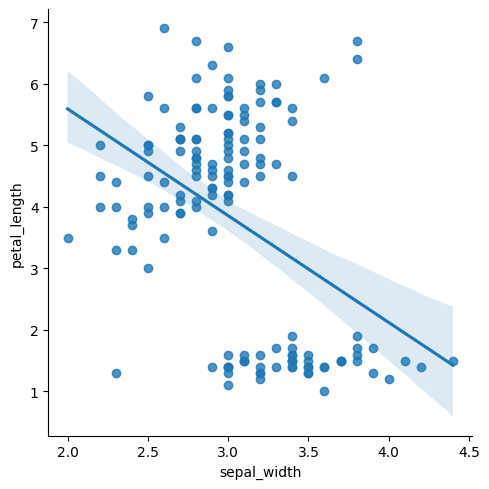

In [72]:
#This phenomenon can be explained by the simpson pardaox
#trend that appears in several groups of data but disappears or !reverses! when the groups are combined
sns.lmplot(x='sepal_width', y='petal_length', data=iris) #this provides a trend line plot rather than using sns.scatterplot
#this graph shows that the data is spread into two groups, because of this the correlation becomes reversed